# Steady Temperature Time Series 

We worked through similar examples in the Active Learning Session. 

## Follow the same approaches to read in the data from 6TMP0015_25C.CSV

This data came from six sensors sitting at steady state in my office, so it should just be a lot of measurements all at the same temperature. However, a quick look at the data makes it clear that each sensor has a different mean and there's quite a bit of noise on the signals as well.

We'll plot some of the data to get a better picture of what you are looking at, then answer the following questions:

In [11]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations
from pandas import *              # pandas for data science
# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

df = read_csv('6TMP0015_25C.CSV')
df.head()

,seconds,T0,T1,T2,T3,T4,T5,BAT,
0,4.534,24.854,26.605,25.571,25.889,25.809,25.013,4.1747,
1,4.558,24.775,26.526,25.730,25.809,25.571,24.854,4.1779,
2,4.570,25.332,26.366,25.650,25.889,25.650,24.934,4.1747,
3,4.578,25.093,26.526,25.889,25.889,25.491,25.173,4.1763,
4,4.586,25.252,26.207,25.889,26.128,25.809,25.093,4.1779,


In [12]:
x = df.to_numpy()
print(x[0])
shape(x)

[4.534 24.854 26.605 25.570999999999998 25.889 25.809 25.013 4.1747 ' ']


(40354, 9)

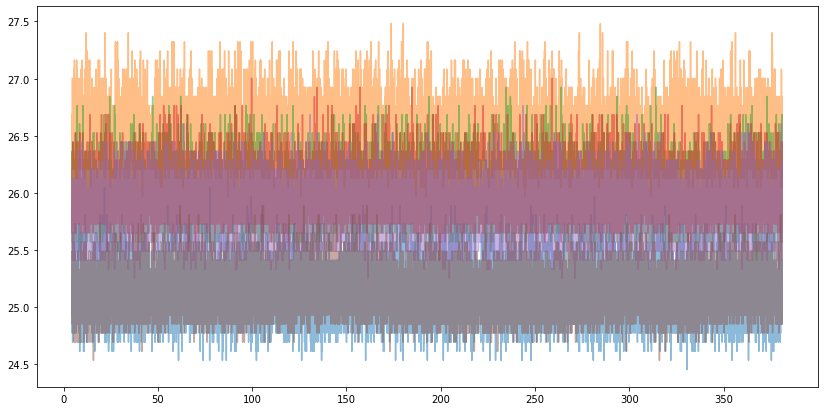

In [16]:
t = x[:,0]
d = x[:,1:]
plot(t,d[:,0:6],alpha=0.5)

## Means, Standard Deviations and Uncertainties
What are the means and standard deviations for each of the six sensors over the sampling time? Are they each showing the same sort of behaviour except for different temperature offsets? Estimate the amount of uncertainty in a temperature measurement that would come from selecting a TMP 36 at random. (How much scatter is there in the means?) Estimate the uncertainty in a single temperature measurement that would come from electrical noise. (How much scatter is there in the measurements from a single sensor?) How would you proceed if you wanted to get better measurements from one of these sensors?

In [17]:
means = np.zeros(6)
stds = means.copy()
for i in range(0,6): 
    means[i] = np.mean(d[:,i])
    stds[i] = np.std(d[:,i],ddof=1)
print('Means for each Transducer', np.array_str(means,precision = 2))
print('Standard Deviations for each Transducer',np.array_str(stds,precision = 2))
print('Standard Deviation of the sample of Means', np.std(means,ddof=1))

Means for each Transducer [25.1  26.48 25.94 26.   25.78 25.13]
Standard Deviations for each Transducer [0.16 0.15 0.15 0.14 0.15 0.14]
Standard Deviation of the sample of Means 0.5377169675829234
